# Case study on the dataset 'Advertising'. From Data Reading to Model Building.

Software used - Anaconda3
Platform used - jupyter notebook
language used - Python 3
Make sure you install Anaconda as per your sysetem's OS bit(32 or 64)

In [2]:
import numpy as np                  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(1) import module in python is similar to #include in C/C++, to import a library, package, function, etc.
(2) NumPy, which stands for Numerical Python, is a library used to perfrom mathematical and logical operations on arrays.
(3) Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful       data structures.
(4) Seaborn is a Python data visualisation library similar to matplotlib but with far more attractive and informative graphics.
(5) Matplotlib is a package for 2-D data visualisation. Pyplot is just used to make it more interactive.
(6) 'As' clause here is used to give aliases to above packages and libraries for our convenience.

In [46]:
data=pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Note: The sales are in thousands of units and the budget is in thousands of dollars.

(1) Here, we have read the csv file(comma seperated files) using pandas. It automatically converts the file into a DataFrame.
(2) DataFrame is a 2-D tabular data structure consisting of rows and columns, with indexes as well.
(3) Also, make sure you keep the files where you have created the .ipynb(Interactive Python Notebook) to avoid manually 
    giving the file path or its directory.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


info() function in pandas is used to give summary on the DataFrame(dataset here), it is a part of Exploratory Data Analysis(EDA). It is not necessary to do this but it is very handy and insightful before looking into your data.

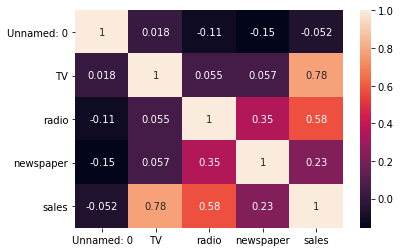

In [5]:
sns.heatmap(data.corr(),annot=True)
plt.show()

A heatmap is a plot of rectangular data as a color-encoded matrix. Here we are only interested into looking at the correlation(interdependence of variable quantities). Correlation as 0 means the two variables have no dependency on each other, 1 means they are max positively correlated(directly propotinal) and -1 means they are max negatively correlated(Indirectly propotional). 
This is to study Statistical relationship between our dataset features(column names basically).


In [47]:
data=data.drop(['Unnamed: 0'],axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


We have dropped the column 'Unnamed: 0' as it was just representing the serial number which we have in a DataFrame by default. It was also an highly insignificant feature for our model building(Data Analysis). Data Cleaning is highly important as a part of Stats before model building, you don't want null values, empty values, insignifacant features, etc. in your model, as that can prove to be a rather poor model on which we cannot rely.

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


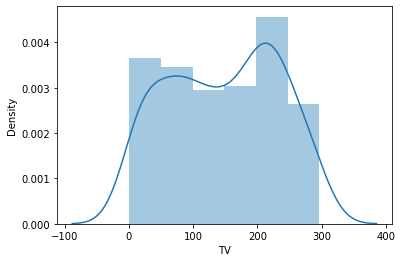

In [37]:
sns.distplot(data.TV)
plt.show()

We have used distplot to see the distribution of the data and its features, this is not a total normal distribution curve. Below, we have checked the skewness.

In [36]:
data.TV.skew()

-0.06985336213274573

So a skewness of 0 means the data is normally distributed, that is, mena=median=mode. Negative means it is left skewed where median>mean and positive skewed means it is right skewed where mean>median. It is important to transform data(normal distribution) if neccessary, to get a good model.

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


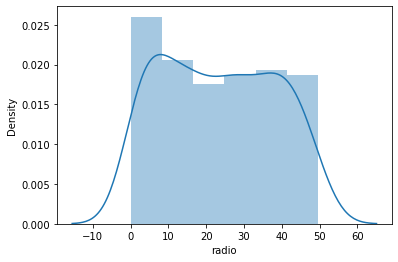

In [42]:
sns.distplot(data.radio)
plt.show()

In [43]:
data.radio.skew()

0.09417463149664404

Here, radio is slight positive skewed, but we need to treat it as it is not high.

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


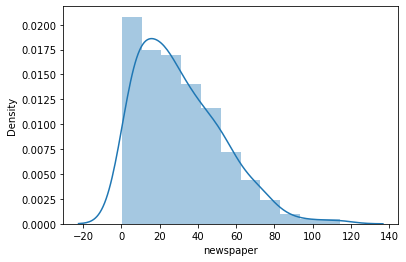

In [49]:
sns.distplot(data.newspaper)
plt.show()

The data is more towards right side, that means it is right-skewed data. We will check it with the skew() function below.

In [48]:
data.newspaper.skew()

0.8947204074986175

Value near to 1, that is, it is right-skewed data. Let's tranform it to reduce the value and get a near to normal distribution.

In [50]:
data['newspaper']=np.sqrt(data['newspaper'])
data

,TV,radio,newspaper,sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9
...,...,...,...,...
195,38.2,3.7,3.714835,7.6
196,94.2,4.9,2.846050,9.7
197,177.0,9.3,2.529822,12.8
198,283.6,42.0,8.136338,25.5


In [51]:
data.newspaper.skew()

0.06238771883281062

You can see that the value has gone down to 0.06, from 0.9. So square root transformation here was a good choice and idea. Let's see the distplot for observation.

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


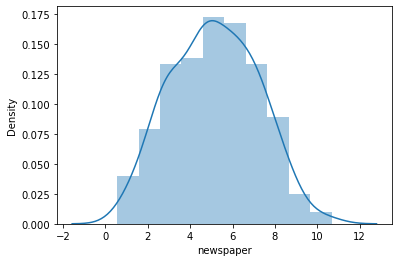

In [52]:
sns.distplot(data.newspaper)
plt.show()

A normal distribution curve, almost.

In [54]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

This is to check if there are any Null values present in our dataset, in this case, there are no null values, so null value treatement will not happen. But, if there are any null values, we need to treat them, in case of numerical, we can replace all null values with mean and in case of categorical, we can replace all the null values with mode. We can also drop the rows where null values are present if it won't affect our data and its model building.

<AxesSubplot:ylabel='TV'>

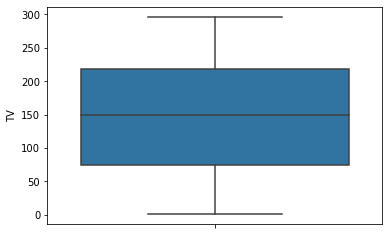

In [58]:
sns.boxplot(y='TV',data=data)
plt.show()

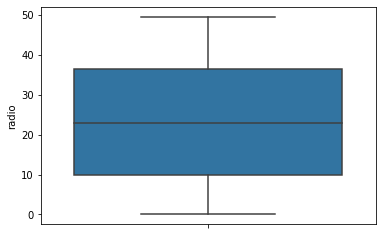

In [59]:
sns.boxplot(y='radio',data=data)
plt.show()

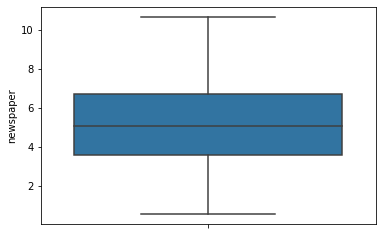

In [60]:
sns.boxplot(y='newspaper',data=data)
plt.show()

boxplot is basically used to check outliers, if there would be any outliers or extreme values, we would treat them.

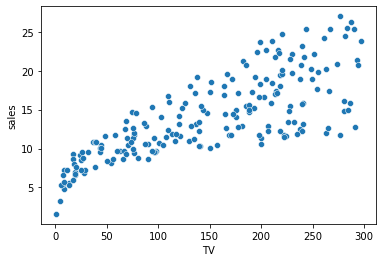

In [65]:
sns.scatterplot(x='TV',y='sales',data=data)
plt.show()

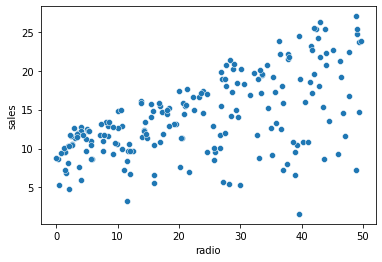

In [66]:
sns.scatterplot(x='radio',y='sales',data=data)
plt.show()

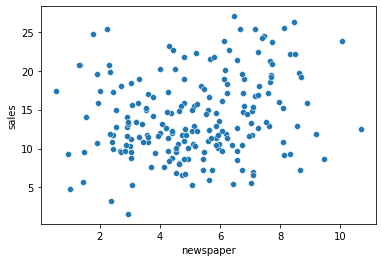

In [67]:
sns.scatterplot(x='newspaper',y='sales',data=data)
plt.show()

So scatterplots show relationship b/w two variables. In above plots, sales has a linear relationship with all the features apart from newspaper.
We can drop newspaper as well, as we have the sufficient information and analysis on it, from correlation to no relationship with the target variable, but, we will still make a model with all the features.

In [53]:
y=data.sales
x=data.drop('sales',axis=1)

Now, sales is our target variable and the rest are the features we need to find out among which are significant or insignificant. So we put sales in y and every other feature apart from sales in x. that is why we didn't check and treated sales above. So we are basically checking which of the independent features affect the sales and with how much value.

In [68]:
import statsmodels.api as sm

Cross-sectional models and methods. The api focuses on models and the most frequently used statistical test and tools. 
Note: One can use various models and techniques instead of what I will be using. This particular data set is not very big and neither it has any categorical columns. 

In [69]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.59e-96
Time:                        15:56:16   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8931      0.387      7.483      0.000       2.131       3.656
TV             0.0458      0.001     32.808      0.000       0.043       0.049
radio          0.1877      0.008     22.127      0.000       0.171       0.204
newspaper      0.0069      0.062      0.112      0.911      -0.115       0.129
==============================================================================
Omnibus:                       59.761   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.047
Skew:                          -1.321   Prob(JB):                     1.17e-32
Kurtosis:                       6.266   Cond. No.                         559.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is the main part, we have prepared our first model using ordinary least squares (OLS). In statistics, OLS is a type of linear least squares method for estimating the unknown parameters in a linear regression model.
Note: OLS only works with numerical features.
So, here, we are only interested in the p-value of the features. We set our hypothesis as:
Null Hypothesis(H0)     : Not a significant feature(p-value>0.05)
Alternate Hypothesis(H1): Significant feature(p-value<0.05)
We will drop newspaper as its p-value>0.05.
Note: 0.05 is the alpha value(95% significance value). We can say that we are 95% confident to reject the null hypothesis.

In [71]:
xc1=xc.drop('newspaper',axis=1)
model1=sm.OLS(y,xc1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           4.83e-98
Time:                        16:28:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our final model is ready with R-square as almost 0.90. This means that 90% of the variation in data is explained by our model, which is a pretty decent model. F-statistic is very high, that means that our model is quite accurate as well. There are other values that can be explained as well, but for this particular topic and case-study, we have done what was needed. So TV and Radio are the significant features in our dataset which are affecting sales in following way:
sales=2.92 + TV*0.0458 + radio*0.1880
In other words, it means that a unit change in TV would increase sales by product of 0.0458 and unit change in radio would increase sales by product 0.1880. They both have a positive relation with Sales. And when we cut the newpaper, it will have no affect on sales.